# Amazon Sales Analysis

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# import csv file
df = pd.read_csv('Amazon Sales data.csv', encoding= 'unicode_escape')

Lets see the basic structure of our data

In [26]:
df.shape

(100, 14)

In [27]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [29]:
#check for null values
pd.isnull(df).sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

No null values found and our data seems correct.

In [30]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [31]:
df.describe(include = 'object')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
count,100,100,100,100,100,100,100
unique,7,76,12,2,4,100,99
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,11/17/2010
freq,36,4,13,50,30,1,2


**Order Priority**: Mostly orders are of high priority

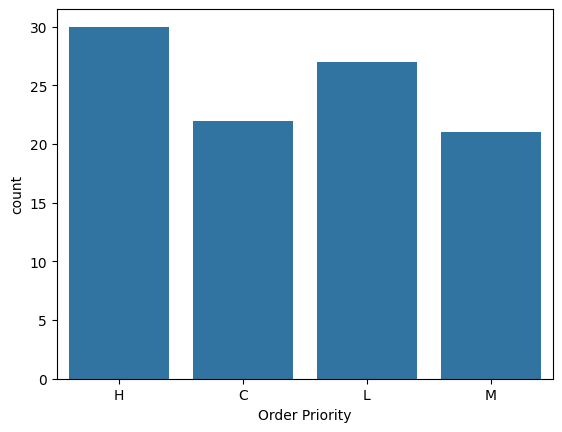

In [32]:
ax=sns.countplot(x='Order Priority',data=df)

## Sales by region

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20128\4209769521.py:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')


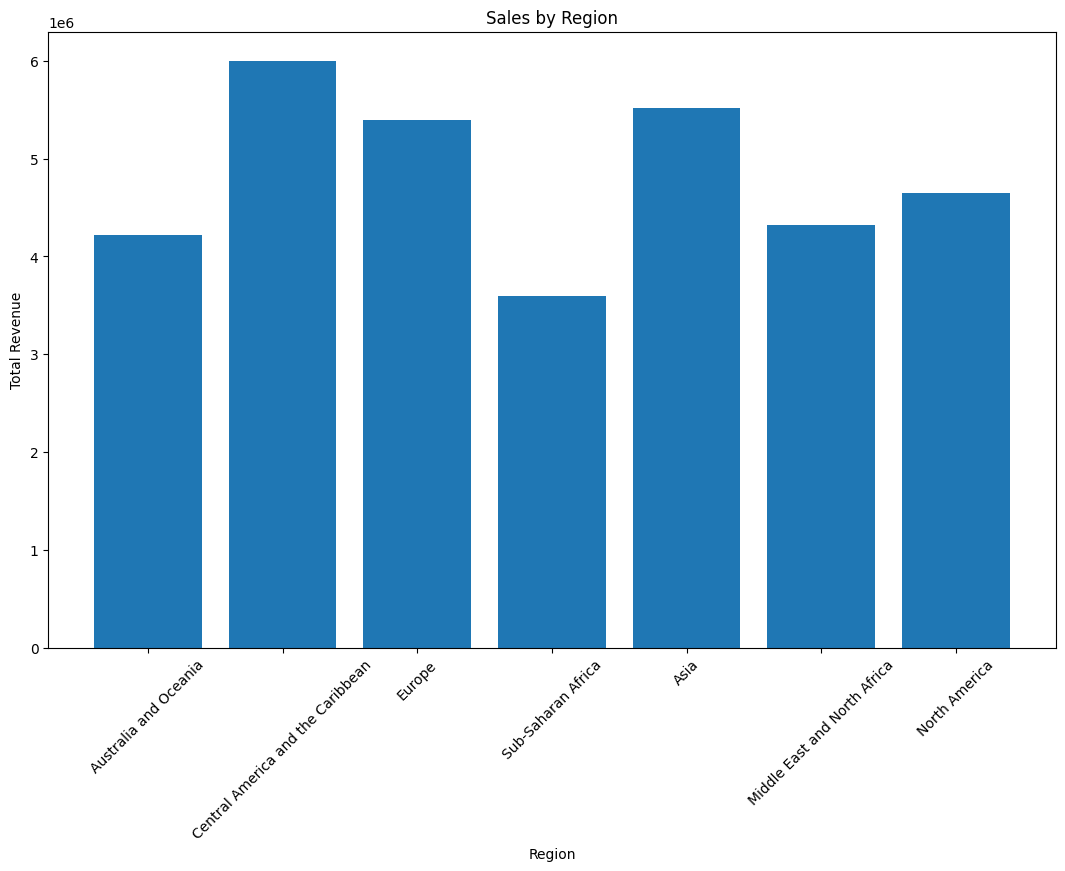

In [34]:
plt.figure(figsize=(13, 8))
plt.bar(df['Region'], df['Total Revenue'])
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Sales by Region')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.show()


**Sales**: 
* We saw mostly sales are from *'Central America and the Caribbean'*. Which generates around 1Cr or 10 Million in revenue.
* The region which generates the least revenue is *'Sub-Saharan Africa'*

## Item Distribution

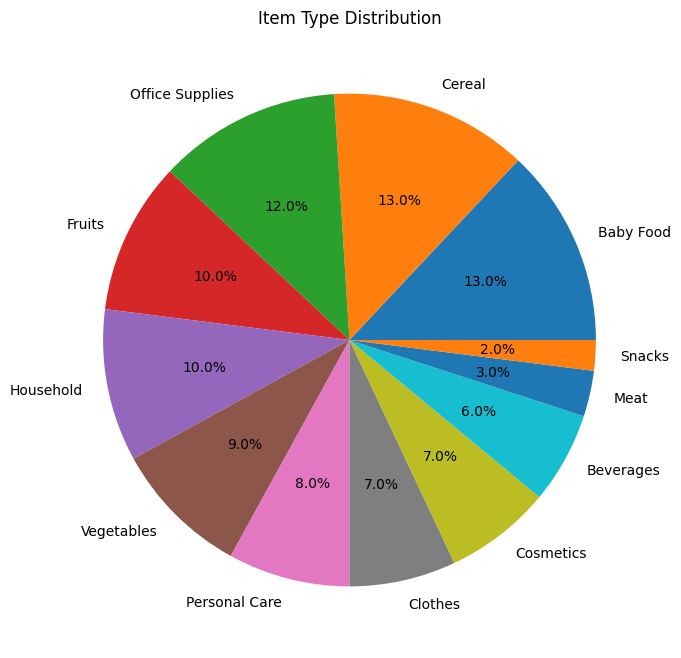

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(df['Item Type'].value_counts(), labels=df['Item Type'].unique(), autopct='%1.1f%%')
plt.title('Item Type Distribution')
plt.show()

**From sales analysis we observed:**
* There are two types of items, i.e, Cereal & Baby Food. Both are 13.0%
* While Snacks being the least type of item getting sold. 2%, which still ain't bad.

## Correlation Heatmap

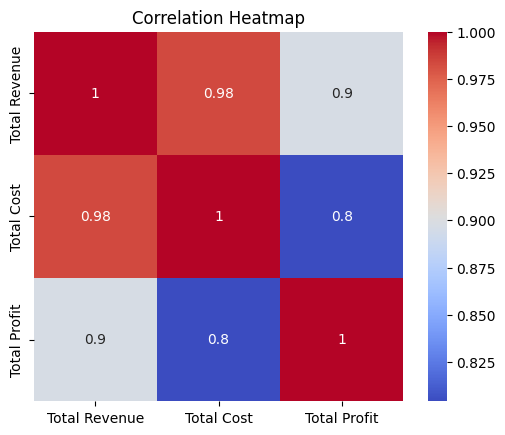

In [36]:
corr_matrix = df[['Total Revenue', 'Total Cost', 'Total Profit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

The squares adjacent to this diagonal represent correlations between:
* <b>Total Revenue</b> and <b>Total Cost</b>, marked as *0.98* (a very strong positive relationship).
* <b>Total Cost</b> and <b>Total Profit</b>, also marked as *0.98* (another strong positive relationship).
* <b>Total Revenue</b> and <b>Total Profit</b>, marked as *0.9* (a strong positive relationship, slightly less than the other two pairs).

Let's understand the relation.
1. Total Revenue and Total Cost being 0.98 indicates a very strong positive relationship between these two variables.
2. Total Revenue (the income generated from sales) increases, we expect that Total Cost (the expenses incurred to produce and sell goods) also increases.
3. When Total Revenue increases, it’s likely that the company is selling more products or services. However, if the Total Cost also increases significantly, it might impact profitability.
4. Monitoring the profit margin (calculated as (Total Revenue - Total Cost) / Total Revenue) is essential. A high correlation between revenue and cost may affect the profit margin.
5. Businesses need to manage costs effectively to maximize profits. If costs rise disproportionately with revenue, it could lead to reduced profitability.

## Monthly Sales Trend

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20128\3534013110.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Total Revenue'].sum()


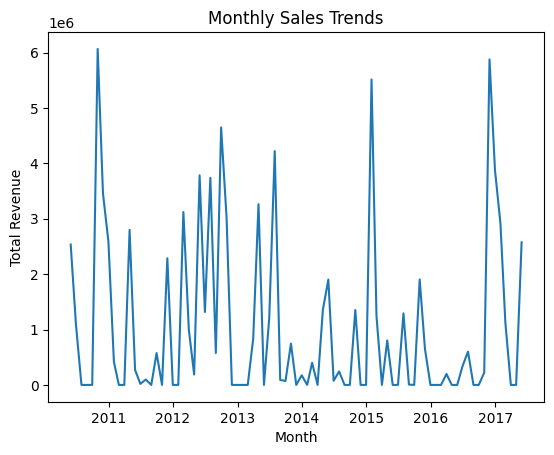

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df.resample('M')['Total Revenue'].sum()
plt.plot(monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trends')
plt.show()

**Insights:**
* **Seasonal Trends:** Analyze peaks and dips to identify seasonal patterns.
* **Strategy Evaluation:** Investigate factors behind high-revenue months.


Calculate mean, median, standard deviation, minimum, and maximum for numeric columns (e.g., Total Revenue, Total Cost, Total Profit)

In [ ]:
summary_stats = df[['Total Revenue', 'Total Cost', 'Total Profit']].describe()
print(summary_stats)


       Total Revenue    Total Cost  Total Profit
count   1.000000e+02  1.000000e+02  1.000000e+02
mean    1.373488e+06  9.318057e+05  4.416820e+05
std     1.460029e+06  1.083938e+06  4.385379e+05
min     4.870260e+03  3.612240e+03  1.258020e+03
25%     2.687212e+05  1.688680e+05  1.214436e+05
50%     7.523144e+05  3.635664e+05  2.907680e+05
75%     2.212045e+06  1.613870e+06  6.358288e+05
max     5.997055e+06  4.509794e+06  1.719922e+06


Interpretation:
- **Total Revenue:** The maximum total revenue is approximately 5,997,055.
- **Total Cost:** The maximum total cost is approximately 4,509,794.
- **Total Profit:** The maximum total profit is approximately 1,719,922.

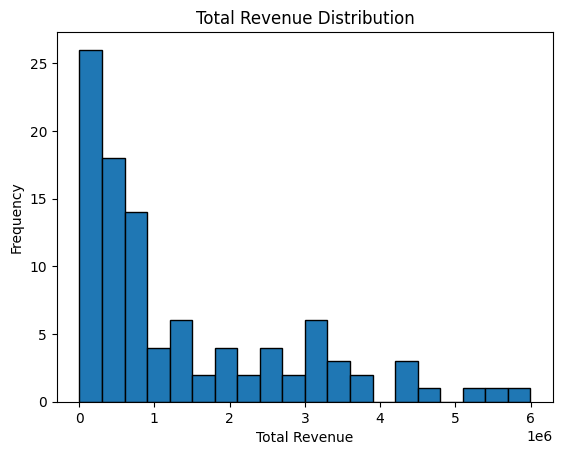

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Total Revenue'], bins=20, edgecolor='black')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Total Revenue Distribution')
plt.show()


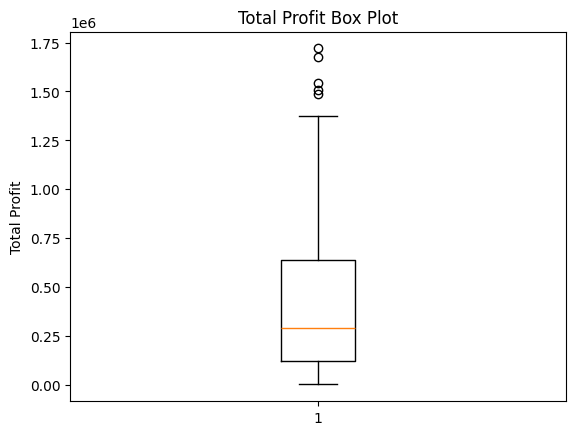

In [ ]:
plt.boxplot(df['Total Profit'])
plt.ylabel('Total Profit')
plt.title('Total Profit Box Plot')
plt.show()


In [ ]:
skewness = df['Total Cost'].skew()
kurtosis = df['Total Cost'].kurtosis()
print(f"Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")


Skewness: 1.46, Kurtosis: 1.53


In [ ]:
correlation_matrix = df[['Total Revenue', 'Total Cost', 'Total Profit']].corr()
print(correlation_matrix)


               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


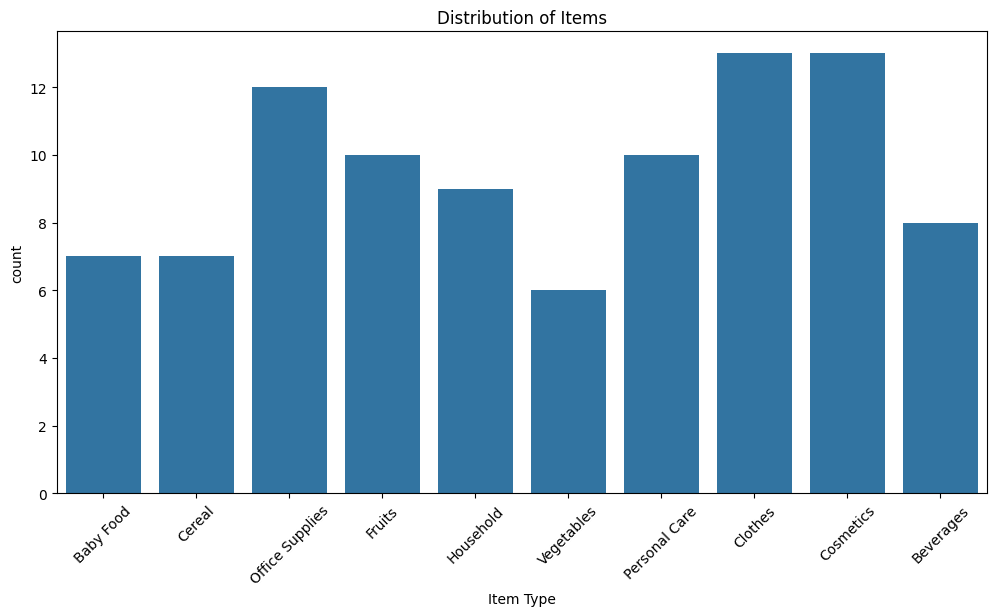

In [ ]:
# top_10_items 
top_10_items = df['Item Type'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Item Type'].isin(top_10_items.index)], x='Item Type')
plt.xlabel('Item Type')
plt.ylabel('count')
plt.title('Distribution of Items')
plt.xticks(rotation=45)
plt.show()
